# 05 · Seasonal Comparasion: January vs. July

## Objective
The primary goal of this notebook is to perform a comparative analysis of Citi Bike usage patterns during two extreme seasons in New York City: winter (January) and summer (July).
1.  **Quantify trip volume differences**: Measure the impact of seasonality on the total number of rides.
2.  **Analyze weather influence**: Compare meteorological variables (temperature, precipitation, humidity) and their correlation with bike demand.
3.  **Evaluate user behavior**: Identify shifts in trip duration, user type distribution (Members vs. Casual), and weekly usage patterns (Weekdays vs. Weekends).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data loading

Load trips data from January and July Parquet

In [3]:
PATH_JANUARY = '../data/processed/trips_enriched/202501-citibike-tripdata.parquet'
PATH_JULY = '../data/processed/trips_enriched/202507-citibike-tripdata.parquet'

df_january = pd.read_parquet(PATH_JANUARY)
df_july = pd.read_parquet(PATH_JULY)

print(f'January data shape: {df_january.shape}')
print(f'July data shape: {df_july.shape}')

January data shape: (1845742, 15)
July data shape: (4484569, 15)


A preliminary look at the data volumes reveals that July recorded more than double the number of trips compared to January. This sharp increase is consistent with more favorable cycling weather and a likely peak in tourism during the summer months.

## Weather Comparison: Winter vs. Summer

To provide context for the trip analysis, a comparison of key meteorological variables is conducted. This establishes how the environmental conditions differ between the coldest and hottest periods of the year in New York City.

In [3]:
# Mean temperature comparison
mean_temp_january = df_january['temperature_c'].mean()
mean_temp_july = df_july['temperature_c'].mean()
print(f'Mean temperature in January: {mean_temp_january:.2f}°C')
print(f'Mean temperature in July: {mean_temp_july:.2f}°C\n')

# Mean precipitation comparison
mean_prec_january = df_january['precipitation_mm'].mean()
mean_prec_july = df_july['precipitation_mm'].mean()
print(f'Mean precipitation in January: {mean_prec_january:.2f}mm')
print(f'Mean precipitation in July: {mean_prec_july:.2f}mm\n')

# Mean wind speed comparison
mean_wind_january = df_january['wind_speed_kmh'].mean()
mean_wind_july = df_july['wind_speed_kmh'].mean()
print(f'Mean wind speed in January: {mean_wind_january:.2f}KmH')
print(f'Mean wind speed in July: {mean_wind_july:.2f}KmH\n')

# Mean humidity comparison
mean_humidity_january = df_january['relative_humidity_%'].mean()
mean_humidity_july = df_july['relative_humidity_%'].mean()
print(f'Mean relative humidity in January: {mean_humidity_january:.2f}%')
print(f'Mean relative humidity in July: {mean_humidity_july:.2f}°%\n')

# Mean cloud cover comparison
mean_cloud_january = df_january['cloud_cover_%'].mean()
mean_cloud_july = df_july['cloud_cover_%'].mean()
print(f'Mean cloud cover in January: {mean_cloud_january:.2f}%')
print(f'Mean cloud cover in July: {mean_cloud_july:.2f}°%')

Mean temperature in January: -0.96°C
Mean temperature in July: 28.08°C

Mean precipitation in January: 0.03mm
Mean precipitation in July: 0.17mm

Mean wind speed in January: 11.87KmH
Mean wind speed in July: 8.84KmH

Mean relative humidity in January: 58.84%
Mean relative humidity in July: 60.88°%

Mean cloud cover in January: 54.11%
Mean cloud cover in July: 56.38°%


* **Temperature:** As expected, July's average temperature is significantly higher, nearing 30°C, compared to -0.96°C in January. This highlights the extreme thermal range NYC experiences across seasons.
* **Precipitation:** Higher average precipitation is observed in July compared to January. This could be attributed to intense summer storms or an unusually dry winter period during this specific year.
* **Wind Speed:** January appears slightly windier, though the difference is not substantial enough to be considered a primary deterrent for all riders.
* **Humidity and Cloud Cover:** Both metrics are higher in July. This results in a humid summer atmosphere, characterized by more frequent cloud cover compared to the winter month.

## Trip Comparison Analysis

Specific trip characteristics are examined below to identify how mobility habits shift according to the season.

### Trip Duration Distribution

The density of trip durations (in minutes) is analyzed to determine if the purpose of the rides changes between winter and summer.

Show graph with samples of: 1000000 (Jan) y 1000000 (Jul).


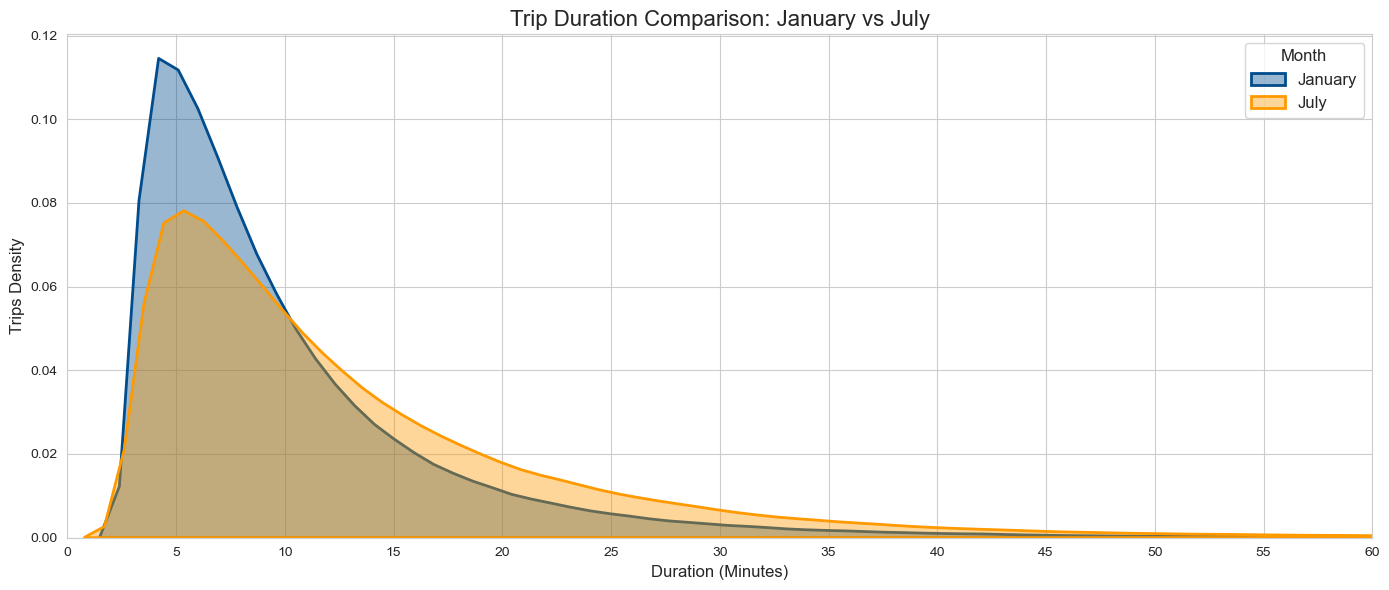

In [7]:
# Create auxiliary columns for trip duration in minutes
df_january['duration_min'] = df_january['trip_duration'] / 60
df_july['duration_min'] = df_july['trip_duration'] / 60

# Get samples for plotting because datasets are too large
SAMPLE_SIZE = 1000000 

if len(df_january) > SAMPLE_SIZE:
    plot_jan = df_january.sample(n=SAMPLE_SIZE, random_state=42)
else:
    plot_jan = df_january

if len(df_july) > SAMPLE_SIZE:
    plot_jul = df_july.sample(n=SAMPLE_SIZE, random_state=42)
else:
    plot_jul = df_july

print(f"Show graph with samples of: {len(plot_jan)} (Jan) y {len(plot_jul)} (Jul).")

plt.figure(figsize=(14,6))
sns.set_style("whitegrid")

sns.kdeplot(
    data=plot_jan,
    x='duration_min',
    color='#004c8c',
    alpha=0.4,
    label='January',
    linewidth=2,
    fill=True
)

sns.kdeplot(
    data=plot_jul,
    x='duration_min',
    color='#ff9900',
    alpha=0.4,
    label='July',
    linewidth=2,
    fill=True
)

plt.title('Trip Duration Comparison: January vs July', fontsize=16)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Trips Density', fontsize=12)

plt.xlim(0, 60)
plt.xticks(np.arange(0, 61, 5))

plt.legend(title='Month', fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.show()

The data confirms that trips in January are generally shorter. In freezing temperatures, the service is likely used for "utility" purposes—getting from point A to point B as quickly as possible. 

In contrast, July shows a shift toward longer rides. The favorable weather encourages the use of bikes for leisure and exploration, resulting in a higher density of long-duration trips.

### User Type Proportions: Members vs. Casual

The ratio of "Annual Members" (subscribers) to "Casual Users" (pay-per-ride) is examined to determine if the summer surge is driven by occasional riders or consistent commuters.

In [ ]:
def plot_distribution(df, column, ax, title, labels_map=None, palette=None):
    """
    Generic function to plot distribution of any categorical column.
    
    Parameters:
    - df: DataFrame with the data.
    - column: Name of the column to analyze.
    - ax: Matplotlib axis where to plot.
    - title: Title of the plot.
    - labels_map: Dictionary to rename values.
    - palette: List of colors.
    """
    
    # Prepate data
    counts = df[column].value_counts().reset_index()
    counts.columns = ['Category', 'Count']
    
    # If labels_map is provided, map the category names
    if labels_map:
        counts['Category'] = counts['Category'].map(labels_map)

    sns.barplot(
        data=counts, 
        x='Category', 
        y='Count', 
        hue='Category', 
        palette=palette, 
        ax=ax
    )
    
    ax.set_title(title, fontweight='bold', pad=20, fontsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("Total Trips")
    sns.despine(ax=ax, left=True)
    
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        if pd.isna(height): height = 0
            
        percentage = '{:.1f}%'.format(100 * height / total)
        
        ax.annotate(f'{int(height):,} ({percentage})', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points',
                    fontsize=11, color='grey', weight='bold')

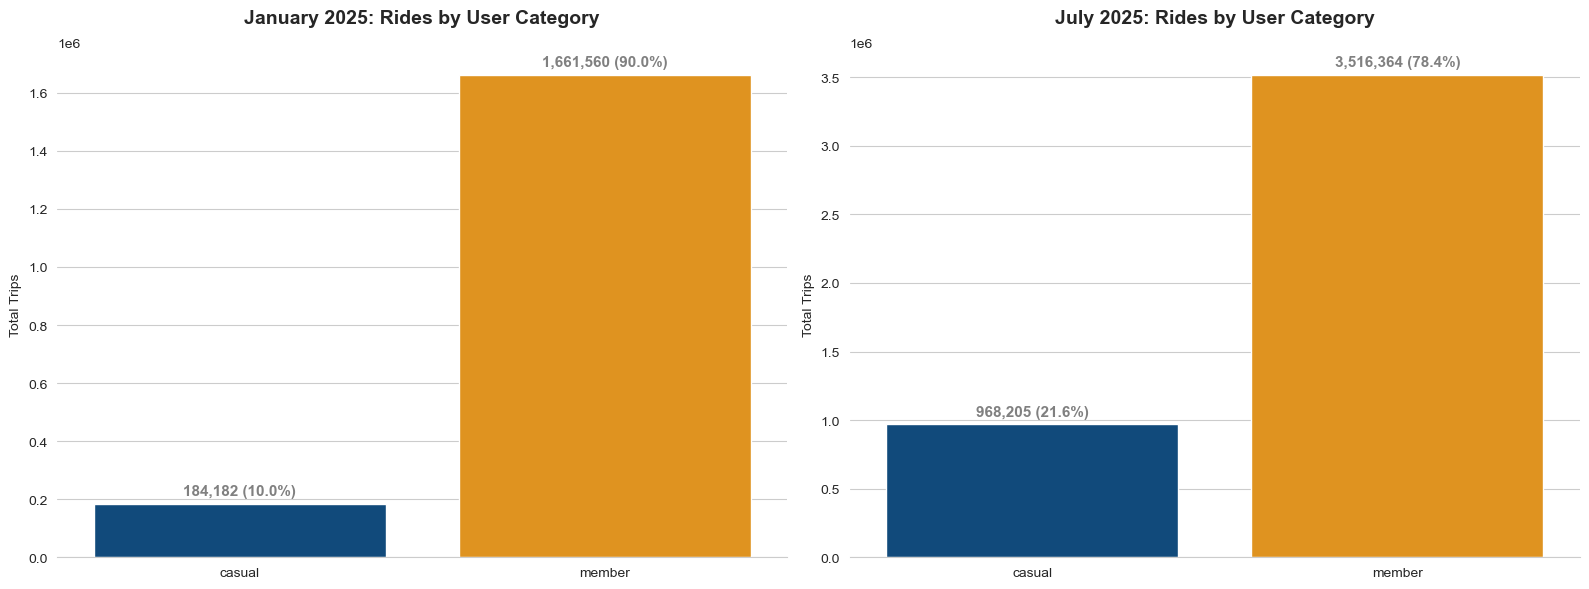

In [10]:
colors = ["#004c8c", "#ff9900"]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_distribution(df_january, 'member_casual', axes[0], "January 2025: Rides by User Category", palette=colors)
plot_distribution(df_july, 'member_casual', axes[1], "July 2025: Rides by User Category", palette=colors)

plt.tight_layout()
plt.show()

Como era de esperar viendo el gráfico anterior de la duración de los viajes, y confirmando la teoría inicial, en verano hay más usuarios del servicio que lo utilizan como forma recreativa, por eso el aumento de usuarios casuales y duración del viaje, mientras que en invierno prácticamente todos los usuarios del servicio lo utilizan como forma de desplazarse rápidamente por la ciudad, posiblemente porque vivan en zonas o quieran ir a un punto concreto en el que el servicio de transporte público de la ciudad no tiene buenas conexiones.

As anticipated by the previous trip duration analysis, and supporting the initial hypothesis, there is a clear trend toward recreational usage during the summer. This is evidenced by the simultaneous increase in casual users and longer trip durations. Instead, winter usage is almost exclusively functional, focused on rapid urban mobility. This suggests that winter riders likely utilize the service to reach destinations with limited public transportation connectivity or to complete specific commuting routes where efficiency is a priority.

### Day vs. Night Trips

This visualization aims to determine whether the favorable temperatures of summer nights correlate with an increase in nocturnal cycling activity.

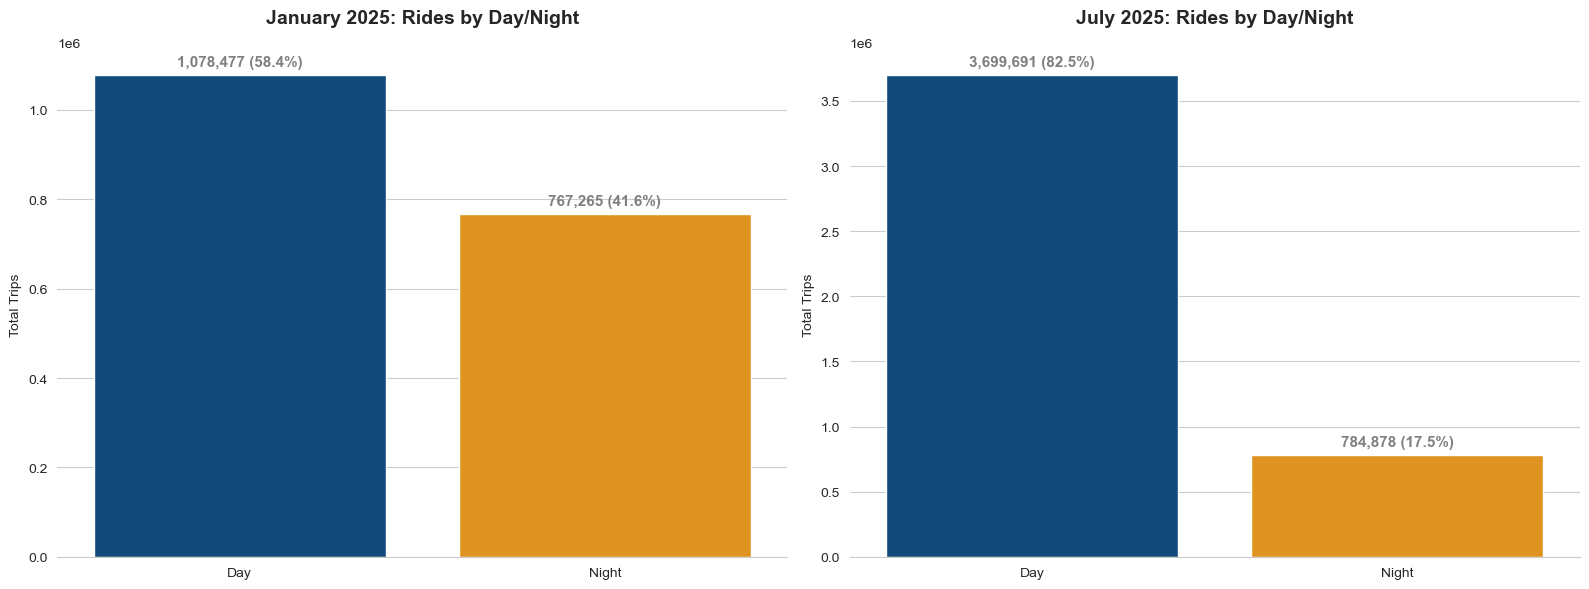

In [12]:
map_day = {0: 'Night', 1: 'Day'}

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_distribution(df_january, 'is_day', axes[0], "January 2025: Rides by Day/Night", labels_map=map_day, palette=colors)
plot_distribution(df_july, 'is_day', axes[1], "July 2025: Rides by Day/Night", labels_map=map_day, palette=colors)

plt.tight_layout()
plt.show()

At first glance, the data surprisingly indicates a higher volume of night trips in January compared to July. However, this representation is potentially misleading. During winter, daylight hours are significantly shorter. Therefore, regular commuters traveling to or from work are likely to be categorized under "night" (trips occurring before sunrise or after sunset). To validate this theory and obtain a clearer perspective on nocturnal behavior, a comparison is conducted specifically for trips occurring between 22:00 and 06:00.

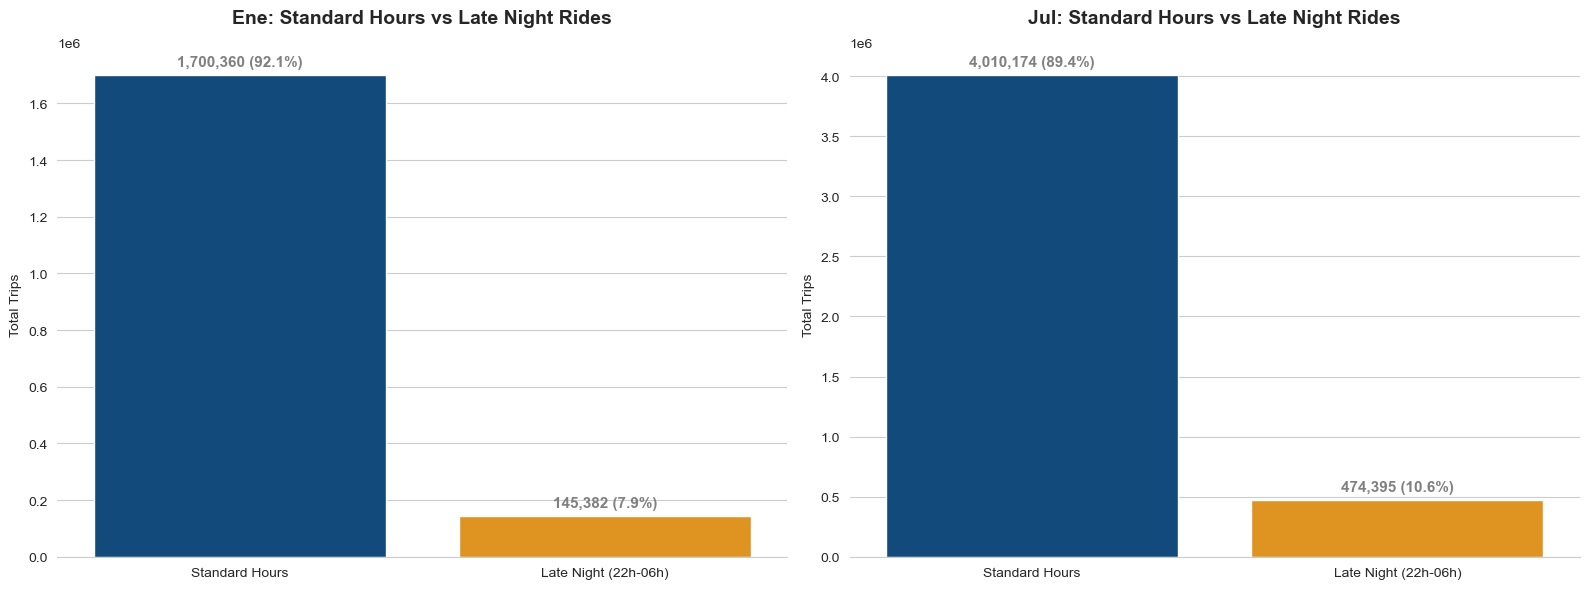

In [15]:
# Create auxiliary column for real night rides
df_january['real_night_ride'] = np.where((df_january['started_at'].dt.hour >= 22) | (df_january['started_at'].dt.hour < 6), 1, 0)
df_july['real_night_ride'] = np.where((df_july['started_at'].dt.hour >= 22) | (df_july['started_at'].dt.hour < 6), 1, 0)

map_night = {0: 'Standard Hours', 1: 'Late Night (22h-06h)'}

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_distribution(
    df_january, 
    'real_night_ride', 
    axes[0], 
    "Ene: Standard Hours vs Late Night Rides", 
    labels_map=map_night, 
    palette=colors
)

plot_distribution(
    df_july, 
    'real_night_ride', 
    axes[1], 
    "Jul: Standard Hours vs Late Night Rides", 
    labels_map=map_night, 
    palette=colors
)

plt.tight_layout()
plt.show()


The hypothesis is confirmed. Due to the limited daylight hours in winter, the `is_night` column classifies trips as nocturnal even when they occur during standard commuting times. Furthermore, the data shows a slight increase in service utilization during the late night hours in summer, which is consistent with the more favorable weather conditions.

### Weekday vs. Weekend Analysis

Finally, the distribution of trips between weekdays and weekends is analyzed. This metric serves as a key indicator to distinguish between recreational usage and functional commuting.

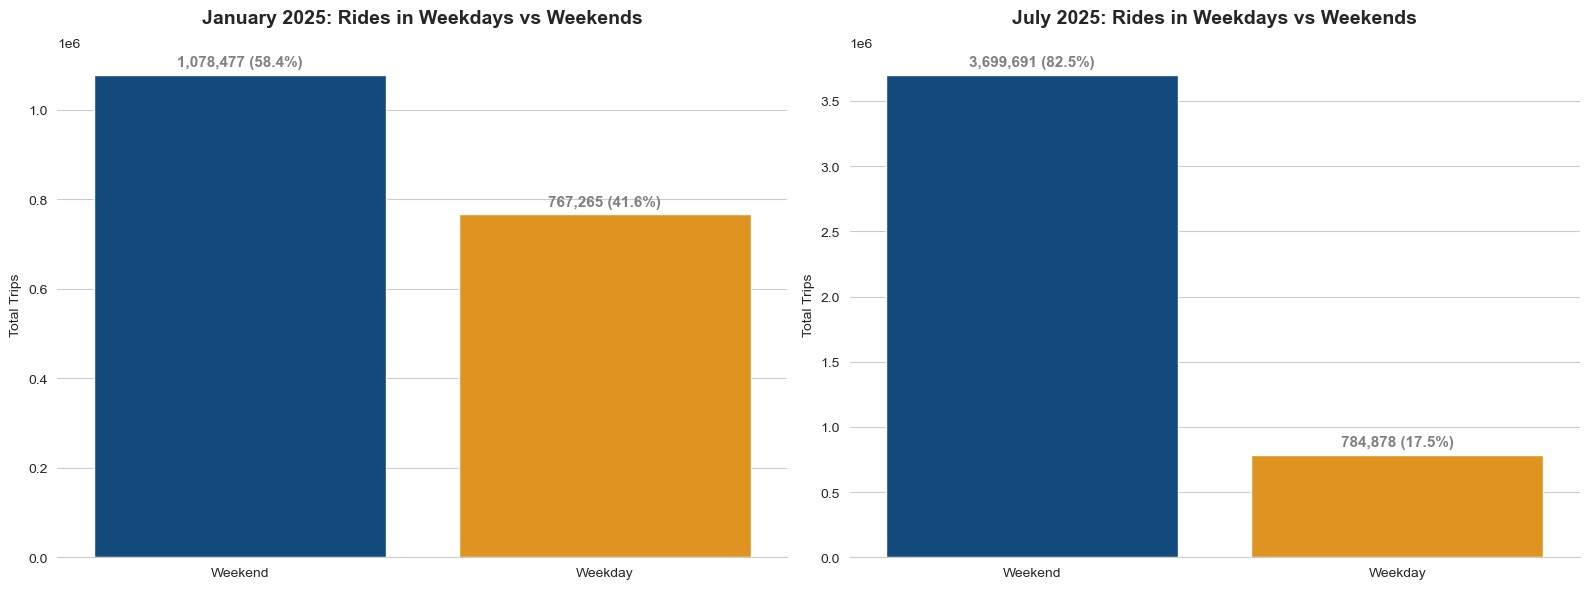

In [13]:
map_week = {0: 'Weekday', 1: 'Weekend'}

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_distribution(df_january, 'is_day', axes[0], "January 2025: Rides in Weekdays vs Weekends", labels_map=map_week, palette=colors)
plot_distribution(df_july, 'is_day', axes[1], "July 2025: Rides in Weekdays vs Weekends", labels_map=map_week, palette=colors)
plt.tight_layout()
plt.show()

As expected, usage proportions vary significantly between summer and winter. However, it is remarkable that the total volume of weekday trips remains relatively stable across both seasons. This suggests that the core group of year-round commuters remains largely unaffected by weather conditions. In contrast, weekend trip volume increases nearly fourfold in July. This dramatic surge highlights that summer usage is predominantly driven by leisure and recreational activities, taking advantage of the improved climate.